In [45]:
import kmapper as km
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import kmapper.evaluate as evaluate

D_Mapper(verbose=1)
Mapping on data shaped (10000, 2) using lens shaped (10000,)



/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


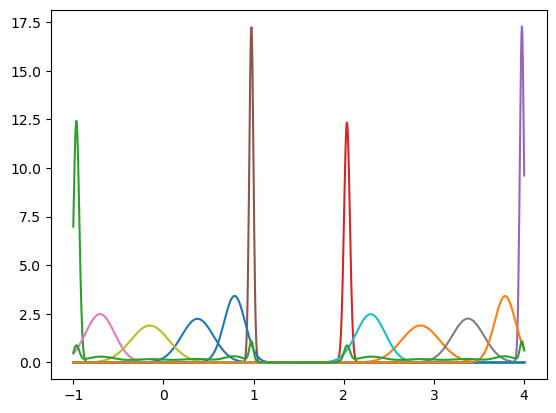

 - Cover - centers: [-0.9655401561835473, -0.7032493499234429, -0.15134612211377751, 0.3776488587207248, 0.7885378574378129, 0.9750136493704074, 2.034656569980772, 2.297787835702958, 2.8502574074829985, 3.3775650334591925, 3.788157201717669, 3.974989331300776]
inner_range: [4.58333288]
radius: [0.04897154668067527, 0.24436966879651167, 0.32017414878931943, 0.2707569409199073, 0.17785138638398612, 0.03518554073775021, 0.04925473975195105, 0.24495385089698152, 0.31950774058814435, 0.2694595370595412, 0.17814638760402168, 0.035219806413107735]
bic:26044.955921618515
alpha_max:0.13
5 and 6 have no intersection
Creating 12 hypercubes.

Created 20 edges and 20 nodes in 0:00:04.673228.


  1%|          | 1/100 [00:05<08:58,  5.44s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
  2%|▏         | 2/100 [00:08<06:35,  4.04s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
  3%|▎         | 3/100 [00:11<06:07,  3.78s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
  6%|▌         | 6/100 [00:22<05:41,  3.64s/it]/home/farmer/miniconda3

SC:0.4325415804957728
SC_norm:0.7162707902478864
TSR:1.0
SC_adj:0.8581353951239432


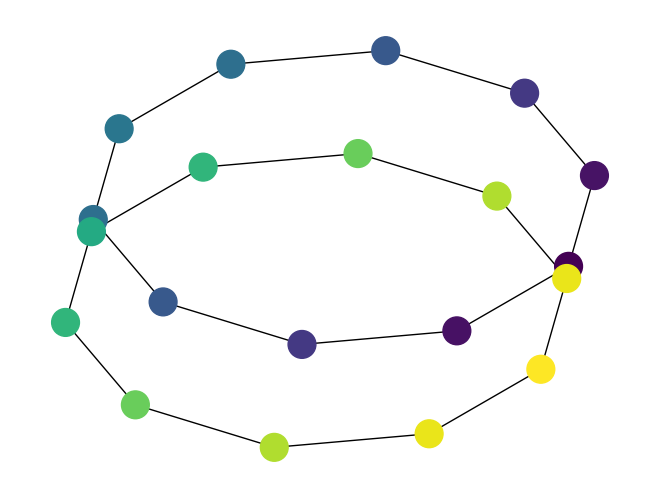

In [53]:
data = np.loadtxt("two_cir.csv",delimiter=",")
projected_data = data[:,0]
n = 12
a = 0.1273

mapper = km.D_Mapper(verbose=1)

cover = km.D_Cover(n_cubes=n,alpha = a,verbose=1,max_iter=200000, n_init=10)

graph = mapper.map(projected_data, data, cover=cover)   

interval_table_1 = cover.interval_table


SC_adj = evaluate.compute_SC_adj(data, projected_data, graph, 
                                 Cover = km.D_Cover(n_cubes=n,alpha = a,verbose=0,max_iter=200000, n_init=10)
                                 ,type = 'd')

color_list1 = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list1.append(color)
G1 = km.adapter.to_networkx(graph)
nx.draw(G1, pos=nx.kamada_kawai_layout(G1), node_color=color_list1, node_size =400)
plt.savefig('2cg.png')
plt.show()


KeplerMapper(verbose=1)
Mapping on data shaped (10000, 2) using lens shaped (10000,)

Creating 12 hypercubes.

Created 16 edges and 16 nodes in 0:00:00.101908.


/tmp/ipykernel_11214/1239112944.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  interval_table_2[0,i] = s
/tmp/ipykernel_11214/1239112944.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  interval_table_2[1,i] = s + x


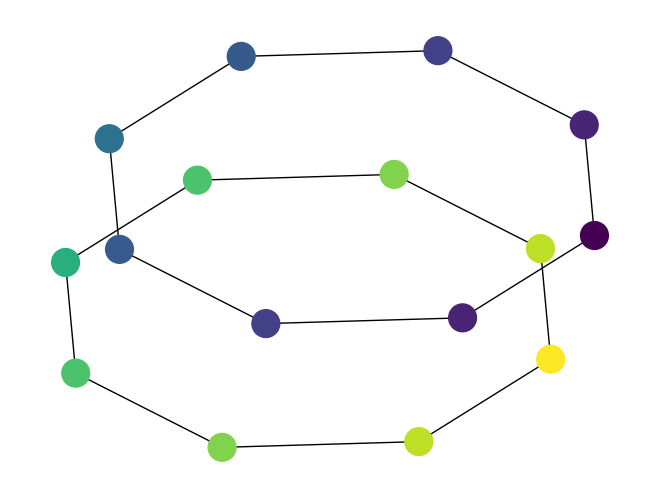

100%|██████████| 100/100 [00:06<00:00, 15.64it/s]


SC:0.2803398344492305
SC_norm:0.6401699172246152
TSR:1.0
SC_adj:0.8200849586123076


In [47]:
n = 12
a = 0.02
mapper = km.KeplerMapper(verbose=1)
cover = km.Cover(n_cubes=n,perc_overlap=a)
graph = mapper.map(projected_data, data, cover=cover)

interval_table_2 = np.zeros((2,n))  
s = cover.bounds_[0]
L = cover.bounds_[1] - cover.bounds_[0]
x = L/(n-(n-1)*a)
for i in range(n):
    interval_table_2[0,i] = s
    interval_table_2[1,i] = s + x
    s = s + (1 - a )*x

color_list2 = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list2.append(color)
G2 = km.adapter.to_networkx(graph)
nx.draw(G2, pos=nx.kamada_kawai_layout(G2), node_color=color_list2, node_size =400)
plt.savefig('2c.png')
plt.show()

SC_adj = evaluate.compute_SC_adj(data, projected_data, graph, cover, type = 'k')

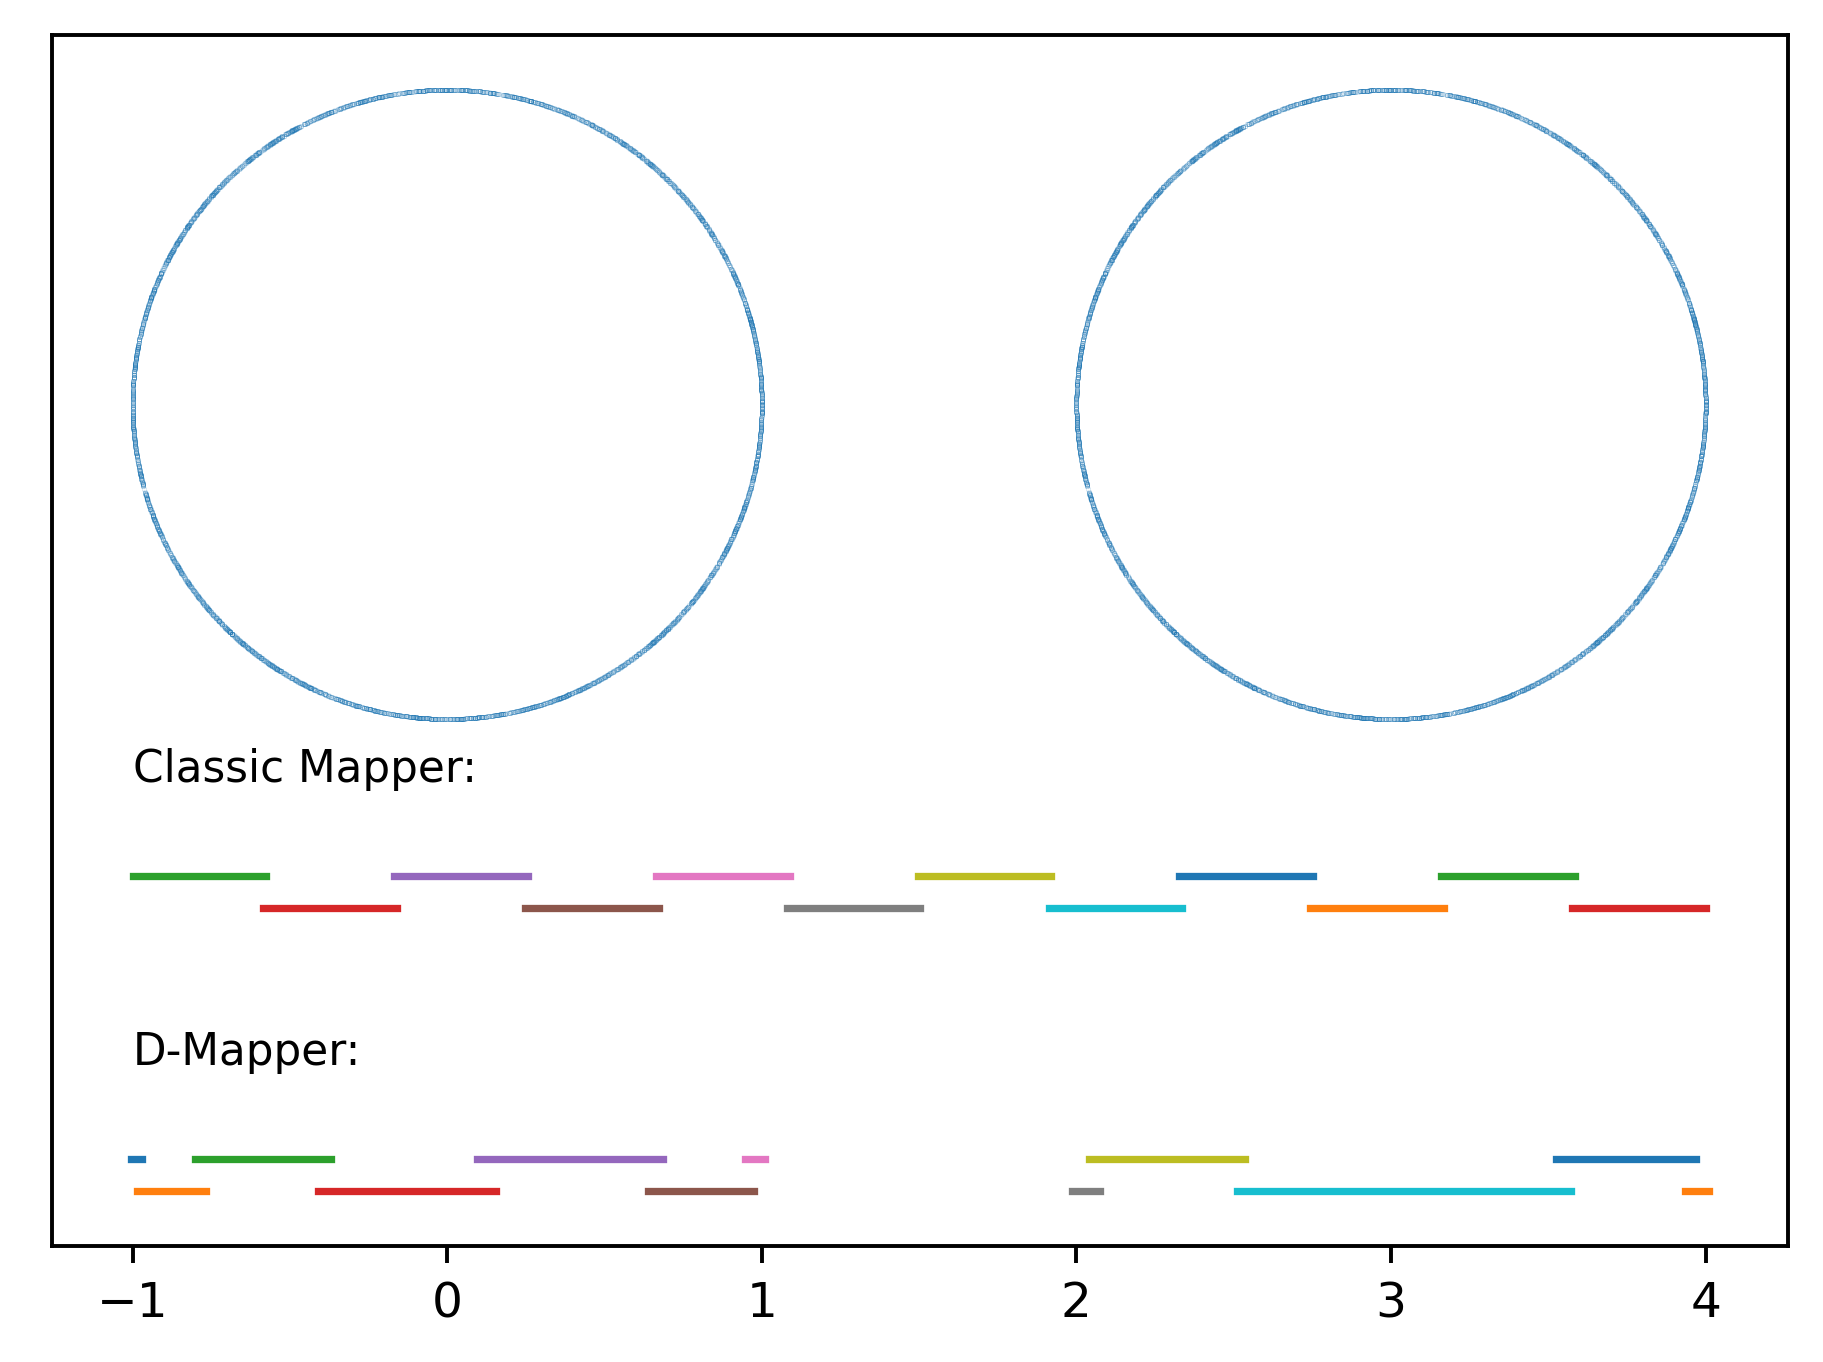

In [48]:
#d_mapper interval
plt.figure(dpi=350)
for i in range(1,interval_table_1.shape[1]+1):
    plt.plot([interval_table_1[0,i-1],interval_table_1[1,i-1]],[0.1*(i % 2)-2.5,0.1*(i%2)-2.5])

#mapper interval
for i in range(1,interval_table_2.shape[1]+1):
    plt.plot([interval_table_2[0,i-1],interval_table_2[1,i-1]],[0.1*(i % 2)-1.6,0.1*(i%2)-1.6])

plt.scatter(data[:,0],data[:,1],s=0.001)

plt.text(-1, -2.1, 'D-Mapper:', fontsize=9) 
plt.text(-1, -1.2, 'Classic Mapper:', fontsize=9) 

ax = plt.gca()
ax.set_aspect(1)
plt.yticks([])
#plt.savefig("interval_fig1.jpg",dpi=350, bbox_inches='tight')
plt.savefig("interval_fig1.eps", bbox_inches='tight')
plt.show()

D_Mapper(verbose=1)
Mapping on data shaped (10000, 2) using lens shaped (10000,)



/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


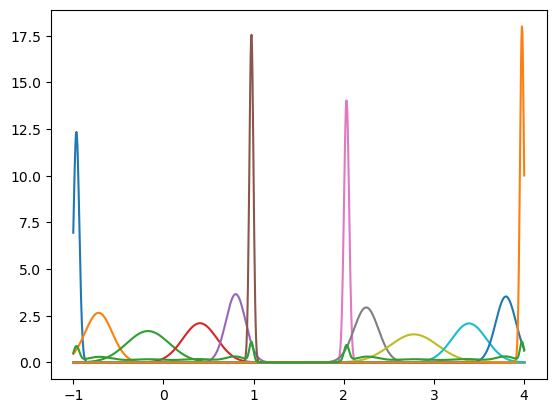

 - Cover - centers: [-0.965363112515031, -0.7187492896275477, -0.17140521846662815, 0.40494163054647825, 0.8012676716224834, 0.9754500621949334, 2.0303211841766733, 2.2484470122943443, 2.777778024829703, 3.3895259661641686, 3.7972253707740014, 3.9759992103696766]
inner_range: [4.58333288]
radius: [0.045418991272726306, 0.21073348237690892, 0.33313883206039496, 0.266613933158132, 0.1531307717284015, 0.03187510755000972, 0.03982117447416966, 0.19017108744673372, 0.37198481688613727, 0.26811307519597616, 0.15859247382704744, 0.031118184518033498]
bic:25960.372876547222
alpha_max:0.15
1 and 2 have no intersection
data 188 not in the interval!
data 1427 not in the interval!
data 2143 not in the interval!
data 2922 not in the interval!
data 3673 not in the interval!
data 3873 not in the interval!
data 4072 not in the interval!
data 4575 not in the interval!
5 and 6 have no intersection
Creating 12 hypercubes.

Created 18 edges and 20 nodes in 0:00:03.998236.


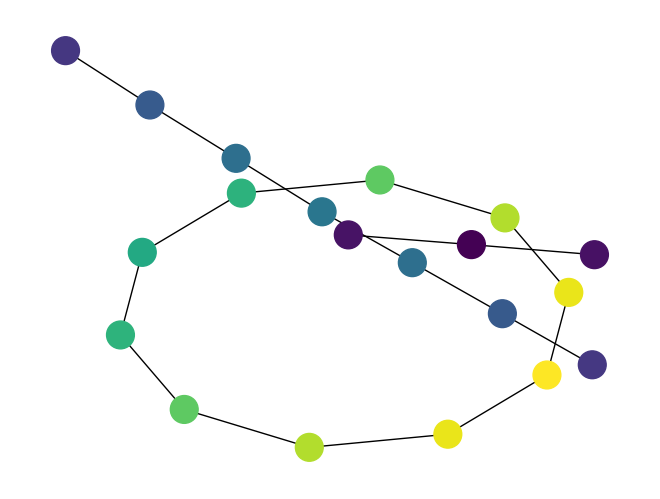

  1%|          | 1/100 [00:04<07:52,  4.77s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
  2%|▏         | 2/100 [00:09<07:30,  4.59s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
  3%|▎         | 3/100 [00:11<05:54,  3.66s/it]/home/farmer/miniconda3/envs/py311_TDA/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
  4%|▍         | 4/100 [00:15<05:40,  3.55s/it]/home/farmer/miniconda3

SC:0.4663504388235942
SC_norm:0.7331752194117971
TSR:0.3333333333333333
SC_adj:0.5332542763725652


In [49]:
data = np.loadtxt("two_cir.csv",delimiter=",")
projected_data = data[:,0]
n = 12
a = 0.16
init = [[-0.96554229]
, [-0.70480828]
, [-0.1586073 ]
, [ 0.37103323]
, [ 0.78636987]
, [ 0.97465643]
, [ 2.03203428]
, [ 2.27841368]
, [ 2.78338418]
, [ 3.30920946]
, [ 3.76601825]
, [ 3.97246293]]
mapper = km.D_Mapper(verbose=1)
cover = km.D_Cover(n_cubes=n,alpha = a,verbose=1, max_iter=200000, n_init=10, tol= 0.75*0.001, means_init = init)

graph = mapper.map(projected_data, data, cover=cover)   

color_list3 = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list3.append(color)
G3 = km.adapter.to_networkx(graph)
nx.draw(G3, pos=nx.kamada_kawai_layout(G3), node_color=color_list3, node_size =400)
plt.show()


SC_adj = evaluate.compute_SC_adj(data, projected_data, graph, 
                                 Cover = km.D_Cover(n_cubes=n,alpha = a,verbose=0, max_iter=200000, n_init=10, tol= 0.75*0.001)
                                 ,type = 'd')



KeplerMapper(verbose=1)
Mapping on data shaped (10000, 2) using lens shaped (10000,)

Creating 12 hypercubes.

Created 15 edges and 16 nodes in 0:00:00.056149.


  2%|▏         | 2/100 [00:00<00:05, 17.19it/s]

100%|██████████| 100/100 [00:05<00:00, 16.78it/s]


SC:0.2847180101976791
SC_norm:0.6423590050988396
TSR:0.4
SC_adj:0.5211795025494198


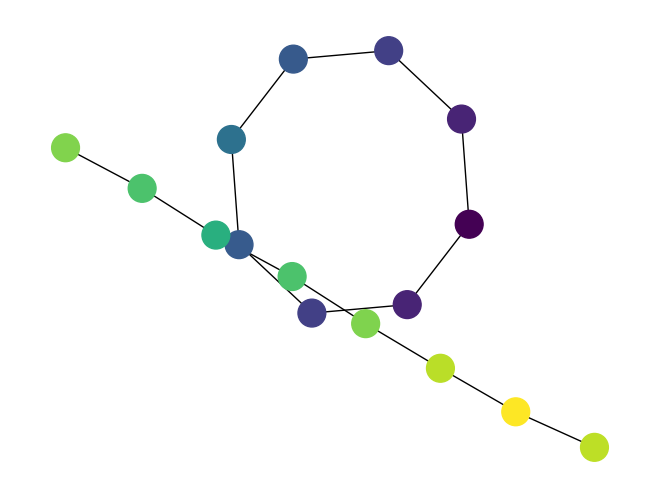

In [51]:
n = 12
a = 0.005

mapper = km.KeplerMapper(verbose=1)
cover = km.Cover(n_cubes=n,perc_overlap=a)
graph = mapper.map(projected_data, data, cover=cover)   

SC_adj = evaluate.compute_SC_adj(data, projected_data, graph, 
                                 Cover = cover
                                 ,type = 'k')

color_list4 = []
for i in range(len(graph['nodes'])):
    index_list = [l for l in graph['nodes'].values()][i]
    color = np.mean(projected_data[index_list])
    color_list4.append(color)
G4 = km.adapter.to_networkx(graph)
nx.draw(G4, pos=nx.kamada_kawai_layout(G4), node_color=color_list4, node_size =400)
plt.show()


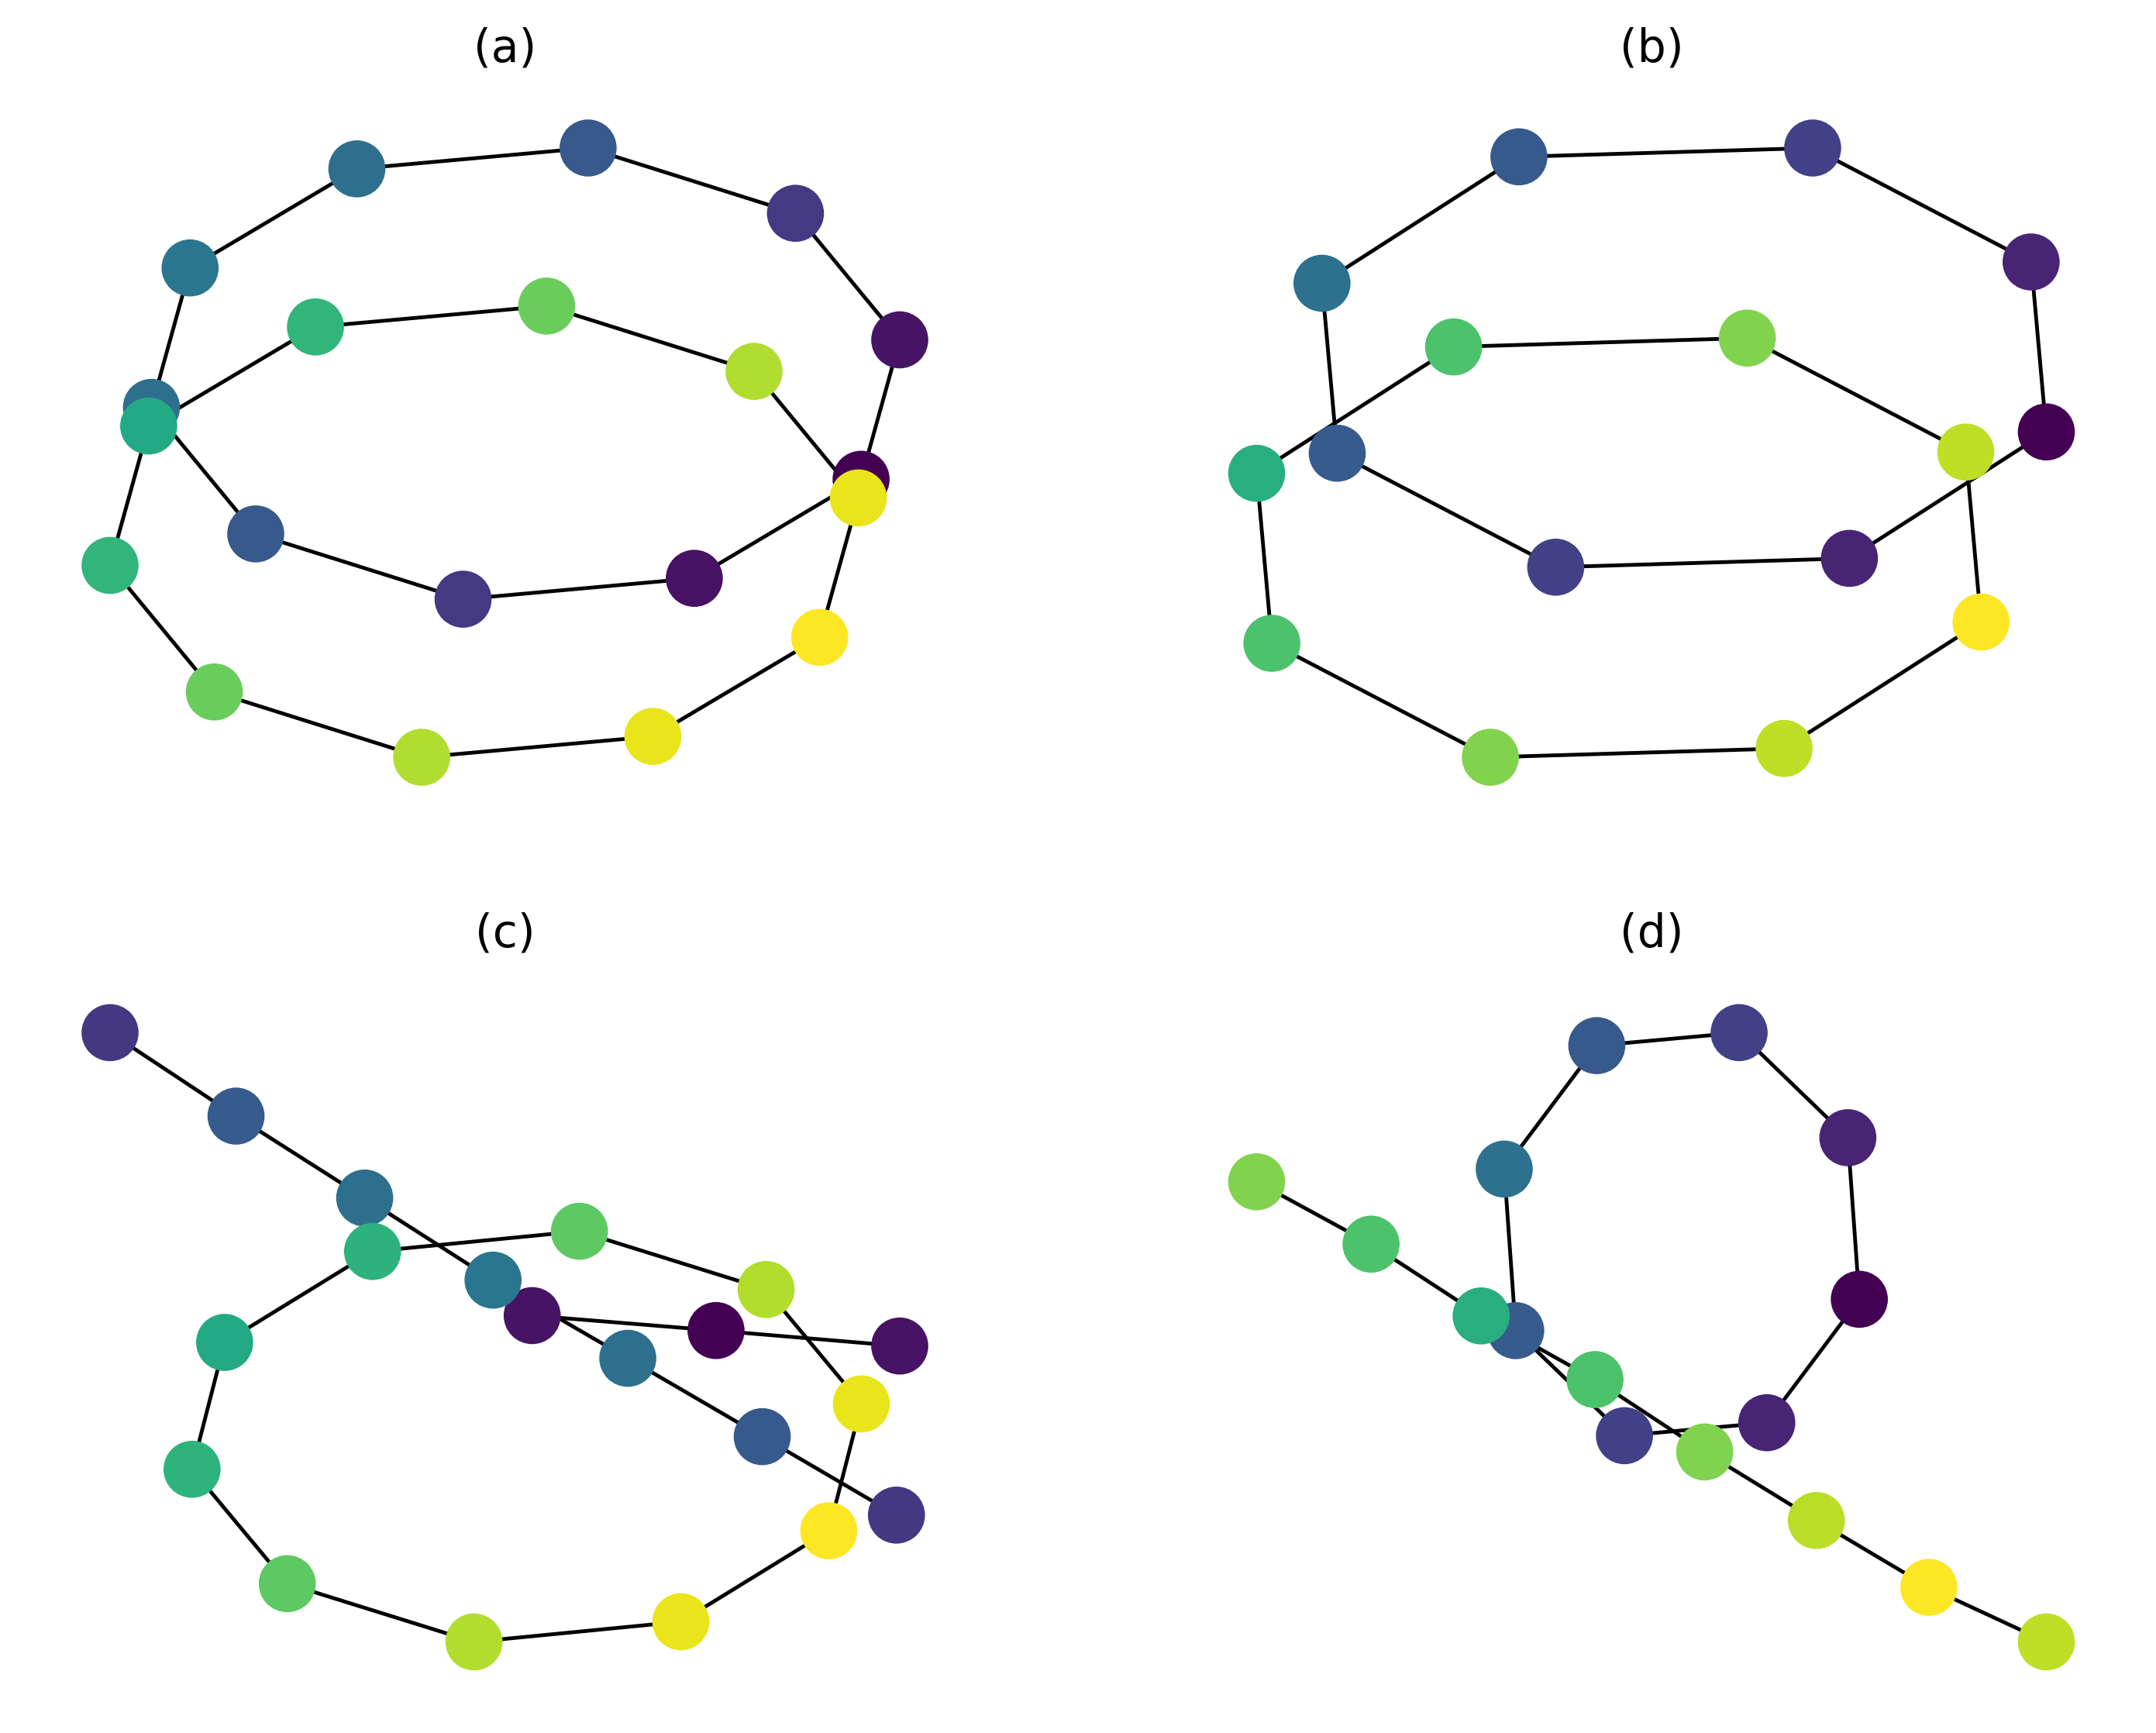

In [54]:
fig = plt.figure(figsize=(10, 12),dpi=350)
grid = plt.GridSpec(3, 2, figure=fig)
# row one
plt.subplot(grid[0,0])
nx.draw(G1, pos=nx.kamada_kawai_layout(G1), node_color=color_list1, node_size =200)
plt.plot()
plt.title('(a)')

plt.subplot(grid[0,1])
nx.draw(G2, pos=nx.kamada_kawai_layout(G2), node_color=color_list2, node_size =200)
plt.plot()
plt.title('(b)')

# row two
plt.subplot(grid[1,0])
nx.draw(G3, pos=nx.kamada_kawai_layout(G3), node_color=color_list3, node_size =200)
plt.plot()
plt.title("(c)")

plt.subplot(grid[1,1])
nx.draw(G4, pos=nx.kamada_kawai_layout(G4), node_color=color_list4, node_size =200)
plt.plot()
plt.title('(d)')

#plt.savefig("two_cir.jpg",dpi=350, bbox_inches='tight')
plt.savefig("two_cir.eps", bbox_inches='tight')
plt.show()
